In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import cPickle as pickle
import gzip
import seaborn as sns

In [3]:
def local_maxima(d):
    '''
    returns bool array with the same shape as `d` with elemets at the position of local maxima in `d` are set to `True`
    this function simply checks if the neighbouring elements are smaller or equal and is __sensitive to noise__
    '''
    return r_[True, d[1:] >= d[:-1]] & r_[d[:-1] > d[1:], True]

def get_spike_idx(V, th=0):
    return np.nonzero(local_maxima(V) & (V>th))[0]

In [4]:
def plot_isis(spike_times, ISIs, neuron_number=0):
    for times,isis in zip(spike_times[neuron_number],ISIs[neuron_number]):
        plot(times[:-1],isis, '.--')
    plt.xlabel('Time (s)')
    plt.ylabel('Interspike Intervals (s)')

#  ToDo's

- classify PNs and LNs into subgroups based on their temporal ISI profile
- calculate the 
- calculate the instantanous firing rate (1/ISI) for each neuron
- average the instantanous firing rate profiles across subgroups

### PNs

In [5]:
PNData = pickle.load(gzip.open('Data/PNdata.pklz'))

dt = 1/20000. #20kHz sampling rate

In [7]:
spike_times_PN = [[get_spike_idx(V)*dt for V in sweeps] for sweeps in PNData]
ISIs_PN = [[diff(st) for st in sweeps] for sweeps in spike_times_PN]

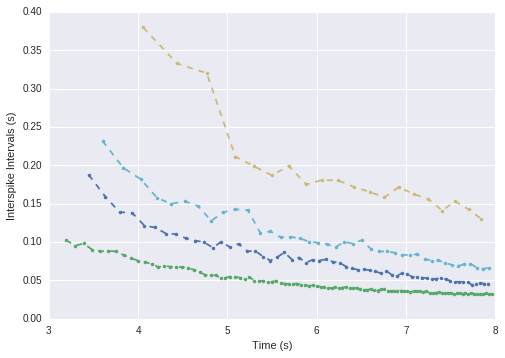

In [8]:
plot_isis(spike_times_PN, ISIs_PN, 0)

### LNs

In [10]:
LNData = pickle.load(gzip.open('Data/LNdata.pklz'))
dt = 1/20000. #20kHz sampling rate

In [11]:
spike_times_LN = [[get_spike_idx(V)*dt for V in sweeps] for sweeps in LNData]
ISIs_LN = [[diff(st) for st in sweeps] for sweeps in spike_times_LN]

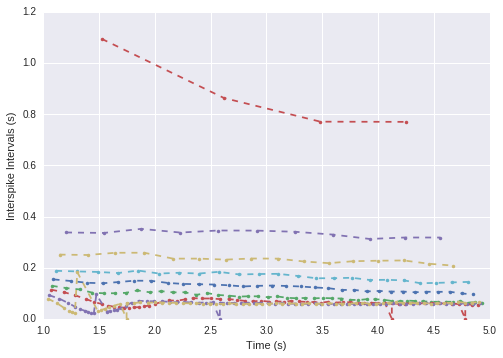

In [12]:
plot_isis(spike_times_LN, ISIs_LN, 0)